In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import seaborn

In [2]:
data = load_wine()

In [3]:
for key in data:
    print(key)

data
target
target_names
DESCR
feature_names


In [4]:
import pandas as pd
wine_df = pd.DataFrame(data["data"], columns = data["feature_names"])
wine_df["label"] = data["target"]

In [5]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
from sklearn.decomposition import PCA
pca_non_norm = PCA(n_components=wine_df.shape[1]-1)
# get all lines and all columns, except the last column because it is both the target variable and a categorical variable
pca_non_norm.fit(wine_df.values[:,:-1])
pca_non_norm.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [7]:
wine_non_norm_pca_loadings = pd.DataFrame(pca_non_norm.components_.transpose(), index = data["feature_names"], columns=[f"PC{i}" for i in range(1,wine_df.shape[1]) ])  

In [8]:
wine_non_norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.001659,0.001203,-0.016874,-0.141447,0.020337,0.194120,-0.923280,-0.284821,-0.086601,-0.002245,-0.014972,-0.015651,0.008029
malic_acid,-0.000681,0.002155,-0.122003,-0.160390,-0.612883,0.742473,0.150110,0.064674,-0.015662,-0.018509,-0.023188,0.067296,-0.011090
ash,0.000195,0.004594,-0.051987,0.009773,0.020176,0.041753,-0.045010,0.149340,-0.073650,-0.086800,0.954011,-0.132063,-0.173686
alcalinity_of_ash,-0.004671,0.026450,-0.938593,0.330965,0.064352,-0.024065,-0.031527,-0.015154,-0.002045,0.003554,-0.052822,0.005394,0.001940
magnesium,0.017868,0.999344,0.029780,0.005394,-0.006149,-0.001924,-0.001797,0.003552,0.001964,-0.000041,-0.003025,0.000621,0.002285
total_phenols,0.000990,0.000878,0.040485,0.074585,0.315245,0.278717,0.020186,0.177238,-0.255673,0.847195,0.008802,0.003883,-0.026691
flavanoids,0.001567,-0.000052,0.085443,0.169087,0.524761,0.433598,0.038869,0.248117,-0.378307,-0.520138,-0.133205,-0.037488,0.069599
nonflavanoid_phenols,-0.000123,-0.001354,-0.013511,-0.010806,-0.029648,-0.021953,0.004665,-0.006498,-0.036752,0.037713,0.199179,0.147552,0.966466
proanthocyanins,0.000601,0.005004,0.024659,0.050121,0.251183,0.241884,0.309799,-0.870433,0.051520,0.009723,0.135621,-0.013119,-0.017604
color_intensity,0.002327,0.015100,-0.291398,-0.878894,0.331747,0.002740,0.112837,0.081287,0.099029,-0.023147,-0.009820,0.050356,-0.004633


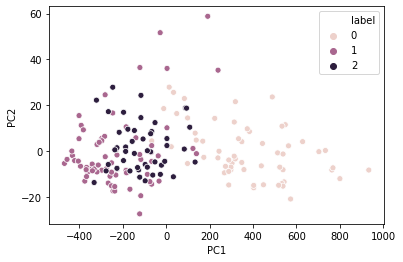

In [9]:
# this is the dataset rotated
wine_non_norm_pca_scores = pca_non_norm.transform(wine_df.values[:,:-1])

#constructing the dataframe
wine_non_norm_pca_scores_df = pd.DataFrame(wine_non_norm_pca_scores, columns = [f"PC{i}" for i in range(1,wine_df.shape[1])])
wine_non_norm_pca_scores_df["label"] = wine_df["label"]

#notice how the scatterplot of the non normalized data is
seaborn.scatterplot(data=wine_non_norm_pca_scores_df, x="PC1", y="PC2", hue="label")

Let's normalize the data and compare!

In [10]:
scaler = StandardScaler()
wine_mtrx_norml = scaler.fit_transform(wine_df.values[:,:-1])

In [11]:
pca_norm = PCA(n_components=wine_df.shape[1]-1)
pca_norm.fit(wine_mtrx_norml)
pca_norm.explained_variance_ratio_


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [12]:
wine_norm_pca_loadings = pd.DataFrame(pca_norm.components_.transpose(), index = data["feature_names"], columns=[f"PC{i}" for i in range(1,wine_df.shape[1]) ])  

In [13]:
wine_norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


In [14]:
import numpy as np
var_cumsum = np.cumsum(pca_norm.explained_variance_ratio_)

In [15]:
pca_norm.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [16]:
# from which index to I have a variance of more than 88%?
np.argwhere(var_cumsum > 0.88)[0]

array([6])

In [17]:
pca_pc7 = PCA(n_components=7)
wine_norm_pca_data = pca_pc7.fit_transform(wine_mtrx_norml)

In [18]:
wine_norm_pca_scored_df = pd.DataFrame(wine_norm_pca_data, columns=[f"PC{i}" for i in range(1,wine_norm_pca_data.shape[1]+1) ])

In [22]:
wine_norm_pca_scored_df["label"] = data["target"]
wine_norm_pca_scored_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0


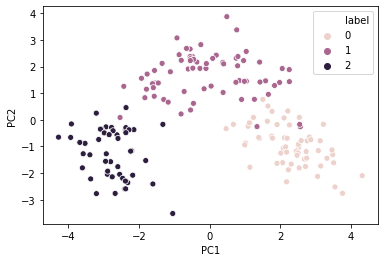

In [23]:
seaborn.scatterplot(data=wine_norm_pca_scored_df, x="PC1", y="PC2", hue="label")

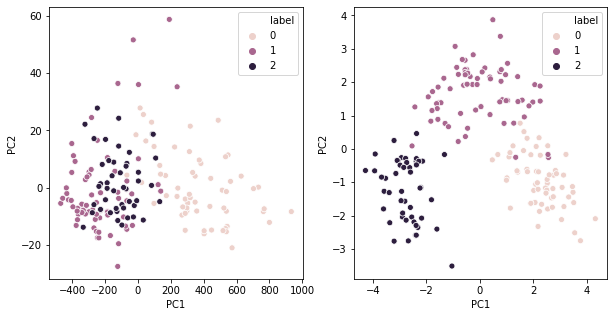

In [25]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
f, axes = plt.subplots(1, 2)
seaborn.scatterplot(data=wine_non_norm_pca_scores_df, x="PC1", y="PC2", hue="label", ax=axes[0])
seaborn.scatterplot(data=wine_norm_pca_scored_df, x="PC1", y="PC2", hue="label", ax=axes[1])

/home/tds/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tds/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


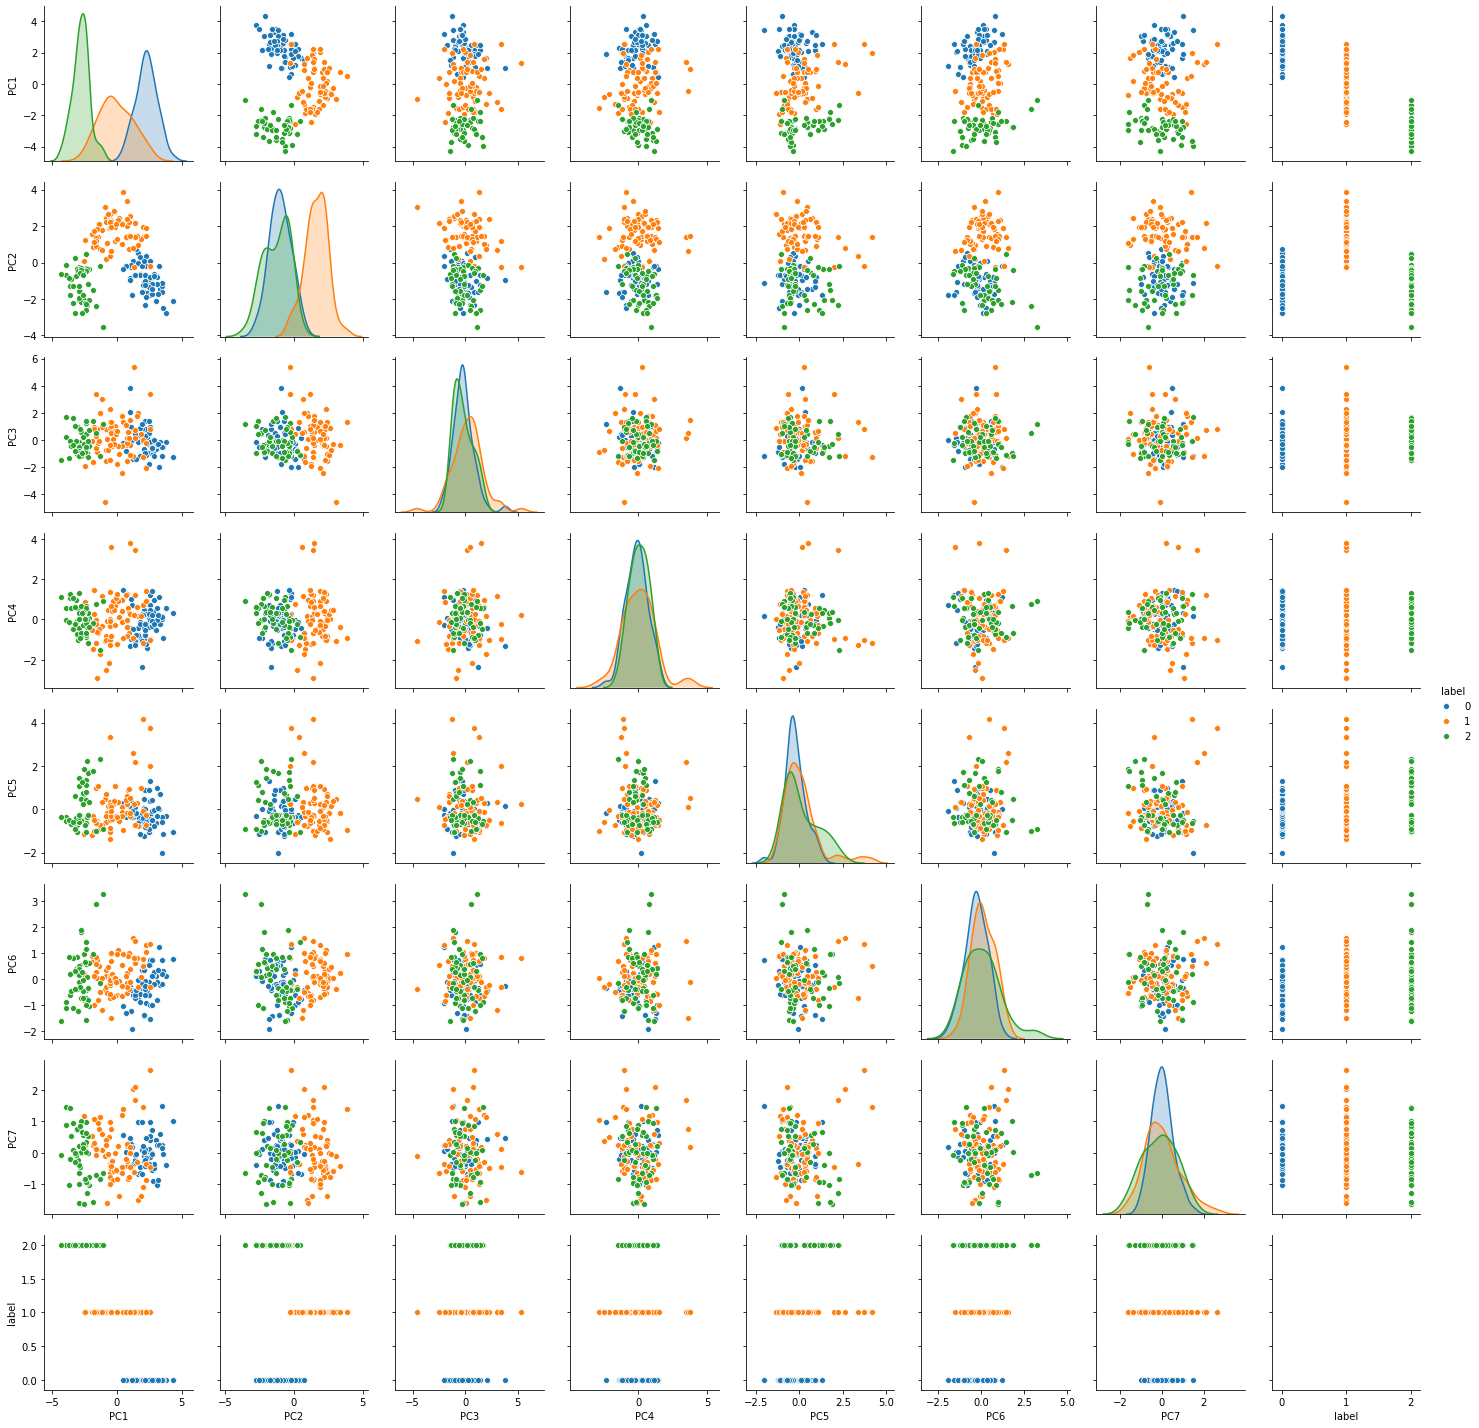

In [28]:
wine_norm_pca_scored_df["label"] = wine_norm_pca_scored_df["label"].astype('category')
seaborn.pairplot(wine_norm_pca_scored_df, hue="label")